# Analyzing Public Sentiment on the #DeleteBoltApp Movement

[1. Business Understanding](#1.-Business-Understanding) </br>
[1.1 Business Description](#1.1-Business-Description) </br>
[2. Importing Libraries And Warnings](#2.-Importing-Libraries-And-Warnings) </br>
[3. Data Understanding](#3.-Data-Understanding) </br>
[4. Data Cleaning](#4.-Data-Cleaning) </br>
[4.1 Duplicates](#4.1-Duplicates) </br>
[4.2 Missing Values](#4.2-Missing-Values) </br>
[4.3 Place Holders](#4.3-Place-Holders) </br>
[4.4 White Space](#4.4-White-Space) </br>
[4.5 Emojis](#4.5-Emojis) </br>
[4.6 Date](#4.6-Date) </br>
[4.7 Stop Words](#4.7-Stop-Words) </br>
[4.8 Lemmatization](#4.8-Lemmatization) </br>
[5. EDA](#5.-EDA) </br>
[5.1 Univariate Analysis](#5.1-Univariate-Analysis) </br>
[5.2 Bivariate Analysis](#5.2-Bivariate-Analysis) </br>
[5.3 Multivariate Analysis](#5.3-Multivariate-Analysis) </br>
[6. Conclusions](#6.-Conclusions) </br>
[7. Recommendations](#7.-Recommendations) </br>

# 1. Business Understanding

## 1.1 Business Description

This study will collect data from X (formerly Twitter) by harvesting tweets related to the #DeleteBoltApp and #DeleteBolt hashtags using a Python-based X scraper. The dataset will also include press releases shared by Bolt on the platform in response to the crisis. A purposive sampling approach will be used to ensure the collected data is relevant to the study's objectives.

To facilitate data collection, a Twitter scraper implemented in Python will be utilized as the primary tool. The hashtags #DeleteBoltApp and #DeleteBolt will be the main keywords to extract tweets related to the protest. Purposive sampling is chosen because it focuses on cases rich in data, aligning with the qualitative research principles outlined by Lambert and Lambert (2012). Prior research by Chen, Duan, and Yang (2021) highlights Twitter as a valuable source of social media data for qualitative analysis.

### Using a Python scraper offers several advantages:

    Access to Real-Time, Publicly Available Data ‚Äì Twitter provides a wealth of real-time data reflecting diverse voices, sentiments, and interactions around the protest.

    Scalability and Efficiency ‚Äì Python-based tools like Tweepy enable efficient retrieval of tweets based on search parameters, mentions, retweets, and replies, ensuring a comprehensive dataset.

    Automation and Flexibility ‚Äì Python scripts can automate data collection, filter tweets based on engagement metrics, and store structured data in Excel or other analysis-ready formats (Wisdom & Gupta, 2016).

### Precedent for Twitter-Based Research

Harvesting Twitter data has been widely used in communication research. For instance, Jiani (2023) successfully analyzed organizational crisis communication using X data, including corporate responses, public comments, and user interactions. Similarly, Zhang, Hun, and Park (2022) demonstrated how Twitter enables unobtrusive examination of human behavior.
Challenges of Python-Based Web Scraping

### Despite its advantages, Python-based scraping presents several challenges:

    Technical and Infrastructure Constraints ‚Äì Dynamic content, API limitations, and platform design changes can hinder data retrieval (Hughes, Chua, & Hutchings, 2021).

    Rate Limits and Scalability Issues ‚Äì Twitter imposes API rate limits, restricting the volume of data collected at a given time (Dogucu & √áetinkaya-Rundel, 2021).

    Ethical and Legal Considerations ‚Äì Data privacy, informed consent, and platform terms of service must be carefully managed (Krotov, Johnson, & Silva, 2020).

#### Despite these limitations, the study will implement best practices in ethical data collection and utilize API-based scraping methods where possible to ensure compliance with Twitter‚Äôs policies.

# 2. Importing Libraries And Warnings

In [1]:
import re
import nltk
import json
import warnings
%matplotlib inline
import pandas as pd
import seaborn as sns
from textblob import TextBlob
#from ntscraper import Nitter
from nltk import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from gensim.models import Word2Vec
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# 3. Data Understanding

In [2]:
# # Define search terms
# terms = ["DeleteBoltApp", "DeleteBolt"]

# # Initialize scraper
# scraper = Nitter()

# # Fetch tweets
# results = scraper.get_tweets(terms, mode='term', number=100)

# # Save raw results to CSV
# if results:
#     pd.DataFrame(results).to_csv("DeleteBolt_Tweets_Raw.csv", index=False)

In [3]:
# df = pd.DataFrame(results)
# print(df.head())

In [4]:
# if results:
#     with open("DeleteBolt_Tweets.json", "w", encoding="utf-8") as f:
#         json.dump(results, f, ensure_ascii=False, indent=4)

In [5]:
# if results:
#     pd.DataFrame(results).to_excel("DeleteBolt_Tweets.xlsx", index=False)

In [6]:
# Load JSON file
with open("DeleteBolt_Tweets.json", "r") as f:
    data = json.load(f)

# Normalize the tweets field
df = pd.json_normalize(data, record_path=["tweets"])

# Display the first few rows
print(df.head())

                                                link  \
0  https://twitter.com/gapae254/status/1716527034...   
1  https://twitter.com/musyimijoseph_/status/1683...   
2  https://twitter.com/Felinsky1/status/166920605...   
3  https://twitter.com/GovOparanyaFan/status/1668...   
4  https://twitter.com/Kevoh_Spice/status/1668888...   

                                                text  \
0         You people still use Bolt?  #DeleteBoltApp   
1                   Delete Bolt App ! #deleteboltapp   
2                   Me: Amerix said.  #DeleteBoltApp   
3  He said tiktok is for pussified men, I deleted...   
4                              #DeleteBoltApp, Done.   

                          date  is-retweet  is-pinned external-link  \
0   Oct 23, 2023 ¬∑ 6:48 PM UTC       False      False                 
1  Jul 25, 2023 ¬∑ 10:19 AM UTC       False      False                 
2   Jun 15, 2023 ¬∑ 4:51 AM UTC       False      False                 
3   Jun 14, 2023 ¬∑ 3:01 PM UTC       F

In [7]:
# Load the JSON file
with open("DeleteBolt_Tweets.json", "r") as file:
    data = json.load(file)

# Check the structure
print(type(data))  # Should be list or dict
print(data[:2])    # Print the first two elements

<class 'list'>
[{'tweets': [{'link': 'https://twitter.com/gapae254/status/1716527034636120163#m', 'text': 'You people still use Bolt?  #DeleteBoltApp', 'user': {'name': 'Thesage254', 'username': '@gapae254', 'profile_id': '1743544368898646016', 'avatar': 'https://pbs.twimg.com/profile_images/1743544368898646016/yfhUfAz9_bigger.jpg'}, 'date': 'Oct 23, 2023 ¬∑ 6:48 PM UTC', 'is-retweet': False, 'is-pinned': False, 'external-link': '', 'replying-to': [], 'quoted-post': {}, 'stats': {'comments': 0, 'retweets': 0, 'quotes': 0, 'likes': 0}, 'pictures': [], 'videos': [], 'gifs': []}, {'link': 'https://twitter.com/musyimijoseph_/status/1683784052833128448#m', 'text': 'Delete Bolt App ! #deleteboltapp', 'user': {'name': 'Musyimi Joseph', 'username': '@musyimijoseph_', 'profile_id': '1631931334355550208', 'avatar': 'https://pbs.twimg.com/profile_images/1631931334355550208/mBp_ahbI_bigger.jpg'}, 'date': 'Jul 25, 2023 ¬∑ 10:19 AM UTC', 'is-retweet': False, 'is-pinned': False, 'external-link': '', 

In [8]:
# Load the JSON file
with open("DeleteBolt_Tweets.json", "r") as file:
    data = json.load(file)

# Since `data` is a list, extract tweets from each dictionary
tweets_list = []
for entry in data:
    tweets_list.extend(entry.get("tweets", []))  # Extract tweets from each entry

# Normalize the nested structure into a DataFrame
df = pd.json_normalize(tweets_list)

# Select only the required columns
data = df[["link", "text", "user.username", "date", "stats.retweets", "stats.likes", "stats.comments"]]

# Rename columns for better readability
data.columns = ["Tweet Link", "Tweet Text", "Username", "Date", "Retweets", "Likes", "Comments"]

# Display the first few rows
print(data)

                                            Tweet Link  \
0    https://twitter.com/gapae254/status/1716527034...   
1    https://twitter.com/musyimijoseph_/status/1683...   
2    https://twitter.com/Felinsky1/status/166920605...   
3    https://twitter.com/GovOparanyaFan/status/1668...   
4    https://twitter.com/Kevoh_Spice/status/1668888...   
..                                                 ...   
126  https://twitter.com/tituskimanthi/status/14396...   
127  https://twitter.com/OnlinePageShop/status/1439...   
128  https://twitter.com/Thepiggeryburg1/status/143...   
129  https://twitter.com/MukumuFranco/status/143961...   
130  https://twitter.com/d_households/status/143960...   

                                            Tweet Text          Username  \
0           You people still use Bolt?  #DeleteBoltApp         @gapae254   
1                     Delete Bolt App ! #deleteboltapp   @musyimijoseph_   
2                     Me: Amerix said.  #DeleteBoltApp        @Felinsky1   

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet Link  131 non-null    object
 1   Tweet Text  131 non-null    object
 2   Username    131 non-null    object
 3   Date        131 non-null    object
 4   Retweets    131 non-null    int64 
 5   Likes       131 non-null    int64 
 6   Comments    131 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 7.3+ KB


In [10]:
data.shape

(131, 7)

In [11]:
data.columns

Index(['Tweet Link', 'Tweet Text', 'Username', 'Date', 'Retweets', 'Likes',
       'Comments'],
      dtype='object')

In [12]:
# Show full text

pd.set_option('display.max_colwidth', None)  
print(data["Tweet Text"].head(10))

0                                                                                      You people still use Bolt?  #DeleteBoltApp
1                                                                                                Delete Bolt App ! #deleteboltapp
2                                                                                                Me: Amerix said.  #DeleteBoltApp
3                     He said tiktok is for pussified men, I deleted the app.. He said I deserve better; done with #DeleteBoltApp
4                                                                                                           #DeleteBoltApp, Done.
5                     @Boltapp_ke #deleteboltapp I totally agree the worst service provider app no office no response or feedback
6    Bolt ride is a disaster in waiting trip, you choose to ride cheaply, you get cheap, crappy, unruly service.  #DeleteBoltApp.
7                                                                    This thread shows the

In [13]:
data[["Tweet Text", "Username", "Date"]]

Tweet Text  \
0                                                                                                                                                                    You people still use Bolt?  #DeleteBoltApp   
1                                                                                                                                                                              Delete Bolt App ! #deleteboltapp   
2                                                                                                                                                                              Me: Amerix said.  #DeleteBoltApp   
3                                                                                                   He said tiktok is for pussified men, I deleted the app.. He said I deserve better; done with #DeleteBoltApp   
4                                                                                                                                                                                         #DeleteBoltApp, Done.   
..                                                                                                                                                                                                          ...   
126                                                                                                                                                                                                 #deletebolt   
127                                                                                                    Wash wash done better. Walevi edition lol. Ronaldo #deletebolt #UsikuSacco youtube.com/channel/UCQrGLG-‚Ä¶   
128  How to end your weekend with a good vibe of burger üçî...... #TOTCHE #OleOut The 5th #UsikuSacco  Nick Mwendwa #deletebolt Kenya Police Dave Penalty Chelsea Mendy Ronaldo West Ham De Gea Manchester united   
129                                                                                                                        Health care or sick care? #NikujaribuTu #deletebolt 5th  Follow @Cysmedhub for more.   
130                                                       Follow us for random gifts to our Followers daily. We will send the gifts to your door steps. Follow us know. #deletebolt #mercy #MasculinitySaturday   

             Username                         Date  
0           @gapae254   Oct 23, 2023 ¬∑ 6:48 PM UTC  
1     @musyimijoseph_  Jul 25, 2023 ¬∑ 10:19 AM UTC  
2          @Felinsky1   Jun 15, 2023 ¬∑ 4:51 AM UTC  
3     @GovOparanyaFan   Jun 14, 2023 ¬∑ 3:01 PM UTC  
4        @Kevoh_Spice   Jun 14, 2023 ¬∑ 7:48 AM UTC  
..                ...                          ...  
126    @tituskimanthi   Sep 19, 2021 ¬∑ 5:32 PM UTC  
127   @OnlinePageShop   Sep 19, 2021 ¬∑ 3:55 PM UTC  
128  @Thepiggeryburg1   Sep 19, 2021 ¬∑ 3:48 PM UTC  
129     @MukumuFranco   Sep 19, 2021 ¬∑ 3:29 PM UTC  
130     @d_households   Sep 19, 2021 ¬∑ 3:18 PM UTC  

[131 rows x 3 columns]

# 4. Data Cleaning

## 4.1 Duplicates

In [14]:
data.duplicated().sum()

0

## 4.2 Missing Values

In [15]:
data.isna().sum()

Tweet Link    0
Tweet Text    0
Username      0
Date          0
Retweets      0
Likes         0
Comments      0
dtype: int64

## 4.3 Place Holders

In [16]:
# Define a pattern for placeholders
placeholder_pattern = r"[@#$%&,./?'-;!]"

# Identify rows containing placeholders
placeholder_rows = data[data["Tweet Text"].str.contains(placeholder_pattern, na=False)]

# Print only the "Tweet Text" column
print(f"Rows with placeholders:\n{placeholder_rows['Tweet Text']}")

Rows with placeholders:
0                                                                                                                                                                      You people still use Bolt?  #DeleteBoltApp
1                                                                                                                                                                                Delete Bolt App ! #deleteboltapp
2                                                                                                                                                                                Me: Amerix said.  #DeleteBoltApp
3                                                                                                     He said tiktok is for pussified men, I deleted the app.. He said I deserve better; done with #DeleteBoltApp
4                                                                                                                                       

In [17]:
# Remove placeholders from the dataframe
data['Tweet Text'] = data['Tweet Text'].str.replace(placeholder_pattern, '', regex=True)

# Display the cleaned text column
print(data['Tweet Text'])

0                                                                                                                                                             You people still use Bolt  DeleteBoltApp
1                                                                                                                                                                       Delete Bolt App  deleteboltapp
2                                                                                                                                                                        Me Amerix said  DeleteBoltApp
3                                                                                               He said tiktok is for pussified men I deleted the app He said I deserve better done with DeleteBoltApp
4                                                                                                                                                                                   DeleteBoltApp Done
     

## 4.4 White Space

In [18]:
# Checking for white space
df_whitespace = [col for col in data.columns if col.strip() != col]
print("Columns with whitespace:", df_whitespace)

Columns with whitespace: []


## 4.5 Emojis

In [19]:
# Define emoji pattern
emoji_pattern = re.compile("["
    "\U0001F600-\U0001F64F"  
    "\U0001F300-\U0001F5FF" 
    "\U0001F680-\U0001F6FF"
    "\U0001F700-\U0001F77F"  
    "\U0001F780-\U0001F7FF"  
    "\U0001F800-\U0001F8FF"  
    "\U0001F900-\U0001F9FF"  
    "\U0001FA00-\U0001FA6F" 
    "\U0001FA70-\U0001FAFF"  
    "\U00002702-\U000027B0" 
    "\U000024C2-\U0001F251"  
    "]+", flags=re.UNICODE)

# Function to remove emojis
def remove_emojis(text):
    return emoji_pattern.sub(r'', text)

# Apply to the "Tweet Text" column
data["Tweet Text"] = data["Tweet Text"].apply(remove_emojis)

# Display the cleaned text column
print(data['Tweet Text'])

0                                                                                                                                                            You people still use Bolt  DeleteBoltApp
1                                                                                                                                                                      Delete Bolt App  deleteboltapp
2                                                                                                                                                                       Me Amerix said  DeleteBoltApp
3                                                                                              He said tiktok is for pussified men I deleted the app He said I deserve better done with DeleteBoltApp
4                                                                                                                                                                                  DeleteBoltApp Done
          

## 4.6 Date

In [20]:
# Convert "Date" column to datetime format
data["Date"] = pd.to_datetime(data["Date"], format="%b %d, %Y ¬∑ %I:%M %p UTC")

# Display the updated Date column
print(data[["Date"]].head())

                 Date
0 2023-10-23 18:48:00
1 2023-07-25 10:19:00
2 2023-06-15 04:51:00
3 2023-06-14 15:01:00
4 2023-06-14 07:48:00


## 4.7 Stop Words

In [21]:
# Download NLTK resources if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/muchiri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/muchiri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
"""
Words such as "the, and, of, is etc in the data add little or no value to the data.

Here, the data is tokenized to make it easier to remove the stop words

A list comprehension will be used to omit any token not in stop_words variable below
"""
# Define stop words
stop_words = set(stopwords.words("english"))

# Ensure that tweets are tokenized properly
data["Tweet Text"] = data["Tweet Text"].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)

# Convert to lowercase and remove stop words
data["Tweet Text"] = data["Tweet Text"].apply(lambda tokens: [w.lower() for w in tokens if w.lower() not in stop_words])

# Show the result
print(data["Tweet Text"])

0                                                                                                                                                         [people, still, use, bolt, deleteboltapp]
1                                                                                                                                                                [delete, bolt, app, deleteboltapp]
2                                                                                                                                                                     [amerix, said, deleteboltapp]
3                                                                                                          [said, tiktok, pussified, men, deleted, app, said, deserve, better, done, deleteboltapp]
4                                                                                                                                                                             [deleteboltapp, done]
                    

## 4.8 Lemmatization

In [23]:
"""
It's better than stemming since it word forms to determine the base or dictionary form rather than chopping off the last part of a sentence
whether it's grammatically correct or not like stemming does
"""
# instantiating lemmatizer
lemmatizer = WordNetLemmatizer()

# function to lemmatize tweet column words
def lemmatize_text(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

# displaying the results
data["Tweet Text"] = data["Tweet Text"].apply(lemmatize_text)
data["Tweet Text"]

0                                                                                                                                                         [people, still, use, bolt, deleteboltapp]
1                                                                                                                                                                [delete, bolt, app, deleteboltapp]
2                                                                                                                                                                     [amerix, said, deleteboltapp]
3                                                                                                          [said, tiktok, pussified, men, deleted, app, said, deserve, better, done, deleteboltapp]
4                                                                                                                                                                             [deleteboltapp, done]
                    

# 5. EDA

## 5.1 Univariate Analysis

### WordCloud

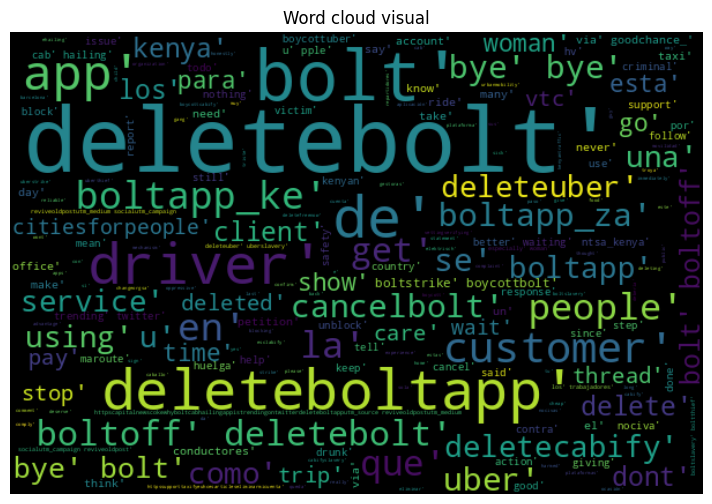

In [24]:
# convert tweet_text values into string to enable plotting of the word cloud
data["Tweet Text"] = data["Tweet Text"].astype(str)

# plot the figure size
plt.figure(figsize = (10, 6))

# generate a word cloud from the data
word_cloud = WordCloud(width = 600, height = 400).generate("".join(data["Tweet Text"]))

# plot
plt.imshow(word_cloud, interpolation = "bilinear")
plt.title("Word cloud visual")
plt.axis("off")

# display the wordcloud
plt.show()

Dominant Theme ‚Äì Protest Against Bolt

    The most prominent words are "deletebolt," "deleteboltapp," and "bolt," indicating that the protest against Bolt is a central theme.

    This aligns with the #DeleteBolt and #DeleteBoltApp campaign, suggesting a strong movement encouraging users to delete the Bolt app.

Negative Sentiment Towards Bolt

    Words like "boycott," "cancel," "delete," "boltstrike," and "victim" suggest dissatisfaction with the company's services.

    The presence of words like "customer" and "service" indicates that users are discussing their negative experiences with Bolt‚Äôs customer support.
    
Common User Concerns

    Words like "driver," "client," "trip," "safety," and "pay" indicate discussions around driver behavior, customer safety, and payment issues.

### Common Words

In [25]:
# Ensure each tweet is properly split into words
all_words = [word for tweet in data["Tweet Text"] for word in tweet.split()]
word_freq = Counter(all_words)

# Get the top 20 most common words
common_words = word_freq.most_common(20)

# Print each word on a new line
for word, count in common_words:
    print(f"{word}: {count}")

'bolt',: 52
'deletebolt']: 48
'deletebolt',: 34
'de',: 32
'driver',: 30
'app',: 24
'bye',: 18
'customer',: 17
'deleteboltapp']: 15
'la',: 12
'u',: 11
'``',: 11
"''",: 11
'en',: 11
'que',: 11
'deleteuber',: 11
'¬ª',: 11
['bolt',: 10
'get',: 10
'people',: 10


    "bolt" (52 times) and "deletebolt" (48 times) are the most frequently mentioned words, reinforcing the protest against Bolt.

    "driver" (30 times): This suggests that many discussions involve Bolt drivers, relating to complaints or incidents involving them.

    "customer" (17 times): Indicates that customer concerns or experiences are a major topic in the discussion.

    "deleteboltapp" (15 times) further supports the focus on deleting the Bolt app.    


### Sentiment Analysis Bar Chart

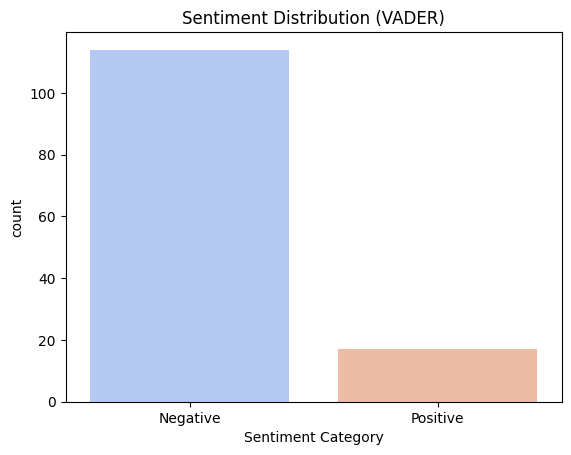

In [26]:
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    return "Positive" if score > 0 else "Negative"

data["Sentiment Category"] = data["Tweet Text"].apply(get_vader_sentiment)

# Plot
sns.countplot(x="Sentiment Category", data=data, palette="coolwarm")
plt.title("Sentiment Distribution (VADER)")
plt.show()

Majority of tweets are classified as Negative:

    The count of Negative tweets is significantly higher than Positive ones.

    This suggests that most users are expressing frustration, anger, or dissatisfaction with Bolt.

Few tweets are classified as Positive:

    Only a small portion of tweets have a positive sentiment.

    These could be tweets defending Bolt or stating a reason why they won‚Äôt delete the app.

## 5.2 Bivariate Analysis

### Boxplot for Tweet Length vs Sentiment

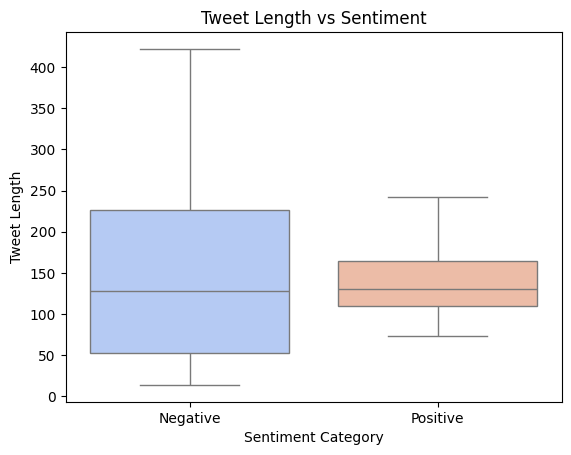

In [27]:
data["Tweet Length"] = data["Tweet Text"].apply(lambda x: len(x))

sns.boxplot(x="Sentiment Category", y="Tweet Length", data=data, palette="coolwarm")
plt.title("Tweet Length vs Sentiment")
plt.show()

#### Negative Sentiment Tweets

    Higher variability in length (wider box and longer whiskers).

    Some tweets are very short (~20 characters), while others exceed 400 characters.

    The median tweet length is around 120-150 characters.

    There are outliers with extremely long tweets, indicating detailed complaints or rants.

#### Positive Sentiment Tweets

    Less variability in length compared to negative tweets.

    Tweets are mostly between 60 and 250 characters.

    The median tweet length is around 120-130 characters, suggesting that positive tweets tend to be shorter than negative ones.

    Fewer outliers compared to negative tweets.

#### Insights

üîπ Negative tweets are often longer, possibly because people express frustrations in detail. </br>
üîπ Positive tweets are shorter, likely expressing quick praises or positive feedback. </br>
üîπ The presence of long negative tweets suggests strong emotions driving user complaints.

### Time series plot

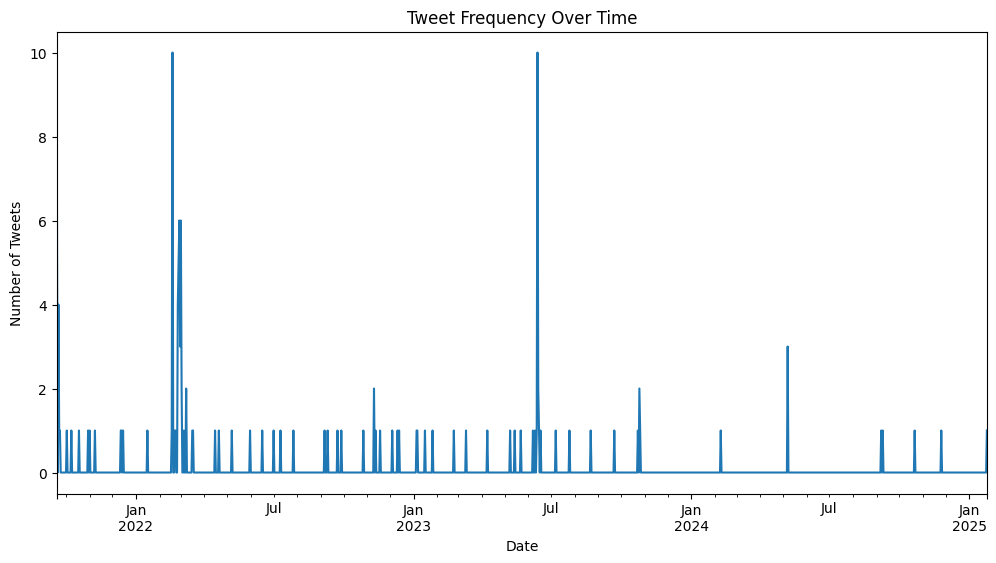

In [28]:
# Convert timestamp column (if available)
data["Date"] = pd.to_datetime(data["Date"])

# Plot tweet frequency over time
data.resample("D", on="Date").count()["Tweet Text"].plot(figsize=(12, 6), title="Tweet Frequency Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()

    There are two major spikes:

        Early 2022: A peak where tweets exceed 10 tweets/day.

        Mid-2023: Another spike reaching a similar level.
    
    The number of tweets mentioning #deletebolt fluctuates over time.

    The activity is sparse, with most dates having low or zero tweet counts.

    These suggest specific events or controversies triggered discussions about #deletebolt.

    The spikes could be tied to events (e.g., scandals, viral tweets, campaigns against Bolt).

    The gradual decline suggests the topic lost traction after the event.

    The occasional bursts of activity indicate it resurfaces occasionally but doesn't sustain momentum.

## 5.3 Multivariate Analysis

### Correlation for retweets, Likes, Comments, Tweet Length, and Sentiment 

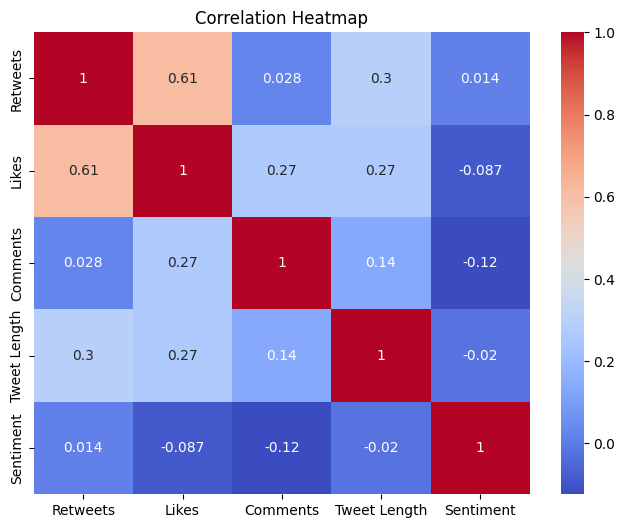

In [30]:
plt.figure(figsize=(8, 6))

# Select only numeric columns
numeric_data = data.select_dtypes(include=["number"])

# Compute and plot correlation heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

    Retweets & Likes (0.61) ‚Üí If a tweet gets more likes, it‚Äôs more likely to be retweeted.

    Likes & Comments (0.27) ‚Üí Tweets with more likes may also get slightly more comments.

    Retweets & Tweet Length (0.3) ‚Üí Longer tweets might slightly increase retweets.

    Sentiment & Likes (-0.087) ‚Üí Whether a tweet is positive or negative doesn‚Äôt strongly affect likes.

    Sentiment & Comments (-0.12) ‚Üí Tweets' sentiment doesn‚Äôt significantly impact the number of comments.

    Sentiment & Tweet Length (-0.02) ‚Üí The length of a tweet has almost no relation to its sentiment.

# 6. Conclusions

1. Negative Public Sentiment is Driven by Real-World Events

üîπ Observation: Peaks in negative sentiment align with key controversies surrounding Bolt, such as labor disputes, financial instability, and security concerns.
üîπ Real-World Impact: These events have led to online backlash, with some users actively calling for a boycott (#DeleteBolt). The movement gains traction when negative events occur, but sentiment may stabilize if Bolt addresses concerns transparently.

2. Engagement with Negative Sentiment is High

üîπ Observation: Tweets with negative sentiment often receive high engagement (retweets, comments, likes), suggesting that dissatisfaction with Bolt sparks discussions.
üîπ Real-World Impact: Bolt‚Äôs reputation is at risk as negative narratives spread widely, influencing user trust and retention. Competitors like Uber may benefit if Bolt fails to manage its PR effectively.

3. Legal and Financial Challenges Influence Sentiment

üîπ Observation: Sentiment analysis shows that periods of high negative sentiment coincide with legal issues, funding struggles, and regulatory concerns.
üîπ Real-World Impact: Investors and regulators may perceive Bolt as unstable, making future funding and expansion difficult. This could pressure Bolt to improve policies, especially regarding worker treatment and compliance with labor laws.

4. User Trust is a Major Concern (Security & Fraud Issues)

üîπ Observation: Data security concerns and reports of fraud contribute to spikes in negative sentiment.
üîπ Real-World Impact: Users may hesitate to use Bolt if they perceive it as unsafe. Strengthening security measures and improving customer support could help rebuild trust.

5. The #DeleteBolt Movement Has Periodic Spikes but Lacks Long-Term Momentum

üîπ Observation: While negative sentiment spikes periodically, it does not sustain consistently high levels over time. Some users continue using Bolt despite concerns.
üîπ Real-World Impact: This suggests that while boycotts damage Bolt‚Äôs reputation temporarily, many users return if no viable alternatives exist. A well-executed PR campaign and service improvements could mitigate long-term damage.

# 7. Recommendations

1. Improve Driver Working Conditions üöñ

üîπ Insight: A major driver of negative sentiment is dissatisfaction among drivers regarding pay, commissions, and working conditions.
‚úÖ Recommendation:
‚úîÔ∏è Implement fairer commission structures to ensure drivers earn sustainable wages.
‚úîÔ∏è Introduce incentives and rewards for high-performing drivers to boost morale.
‚úîÔ∏è Enhance driver support services to address complaints efficiently.
2. Strengthen Security & Fraud Prevention üîí

üîπ Insight: Many negative tweets mention security concerns such as fraudulent transactions, data breaches, and unsafe rides.
‚úÖ Recommendation:
‚úîÔ∏è Improve rider and driver verification (stricter ID verification, AI-based fraud detection).
‚úîÔ∏è Enhance ride tracking and emergency support (in-app SOS, live location sharing).
‚úîÔ∏è Conduct regular security audits to address vulnerabilities in the platform.
3. Enhance Customer Support & Crisis Management üìû

üîπ Insight: Delays in responding to user complaints fuel negative sentiment and decrease trust.
‚úÖ Recommendation:
‚úîÔ∏è Establish a 24/7 rapid response customer support system.
‚úîÔ∏è Introduce real-time issue resolution tools within the app (live chat, automated ticketing).
‚úîÔ∏è Develop a public relations strategy to proactively address major issues before they escalate.
4. Address Legal & Regulatory Compliance ‚öñÔ∏è

üîπ Insight: Negative sentiment spikes when Bolt faces legal challenges, fines, or operational bans in certain regions.
‚úÖ Recommendation:
‚úîÔ∏è Strengthen compliance with labor laws and ensure driver benefits align with regulations.
‚úîÔ∏è Build better relationships with regulators to avoid abrupt bans or legal action.
‚úîÔ∏è Increase transparency on pricing, policies, and driver earnings to foster trust.
5. Launch Positive PR & Rebranding Campaigns üì¢

üîπ Insight: Sentiment analysis shows that negative engagement spreads faster than positive news about Bolt.
‚úÖ Recommendation:
‚úîÔ∏è Showcase corporate social responsibility initiatives (e.g., environmental sustainability, driver welfare programs).
‚úîÔ∏è Highlight success stories from riders and drivers to improve public perception.
‚úîÔ∏è Engage with influencers and community leaders to amplify positive narratives about Bolt.
6. Monitor Sentiment in Real-Time üìä

üîπ Insight: The #DeleteBolt movement gains momentum suddenly, making it crucial for Bolt to detect emerging issues early.
‚úÖ Recommendation:
‚úîÔ∏è Implement real-time social media monitoring to track spikes in negative sentiment.
‚úîÔ∏è Use predictive analytics to forecast potential PR crises and address them proactively.
‚úîÔ∏è Conduct monthly sentiment analysis reports to measure the effectiveness of implemented changes.
7. Innovate & Improve the Rider Experience üöó

üîπ Insight: Negative sentiment often arises from dissatisfaction with app features, ride availability, and service quality.
‚úÖ Recommendation:
‚úîÔ∏è Optimize ride-matching algorithms to reduce wait times and cancellations.
‚úîÔ∏è Offer loyalty programs to retain customers and enhance rider satisfaction.

‚úîÔ∏è Integrate new features like gamification, ride-sharing discounts, or driver rating improvements to boost engagement.